<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week10/Day1/MiniProject_Week10Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Palmer Penguins Dataset.zip to Palmer Penguins Dataset.zip


In [5]:
import zipfile

with zipfile.ZipFile("Palmer Penguins Dataset.zip", "r") as zip_ref:
    zip_ref.extractall("penguins_data")

In [6]:
import os
print(os.listdir("penguins_data"))

['Palmer Penguins Dataset.csv']


In [7]:
import pandas as pd

df = pd.read_csv("penguins_data/Palmer Penguins Dataset.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [8]:
# Missing values
print("Missing values:\n", df.isnull().sum())

# Drop rows
df_clean = df.dropna()

# Confirm
df_clean.info()

Missing values:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [9]:
# Summary statistics
df_clean.describe()

# Unique values
df_clean.nunique()

,0
species,3
island,3
bill_length_mm,163
bill_depth_mm,79
flipper_length_mm,54
body_mass_g,93
sex,2
year,3


<ipython-input-10-111e2252f930>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x="species", palette="Set2")


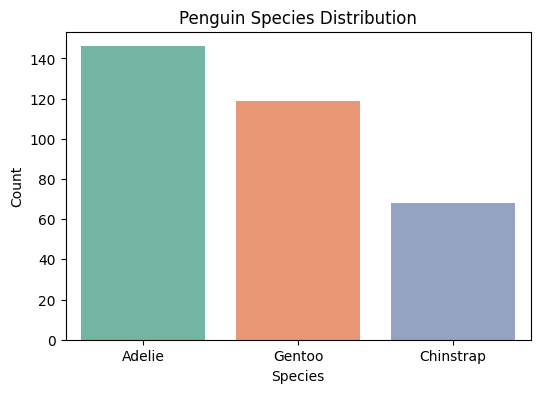

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x="species", palette="Set2")
plt.title("Penguin Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

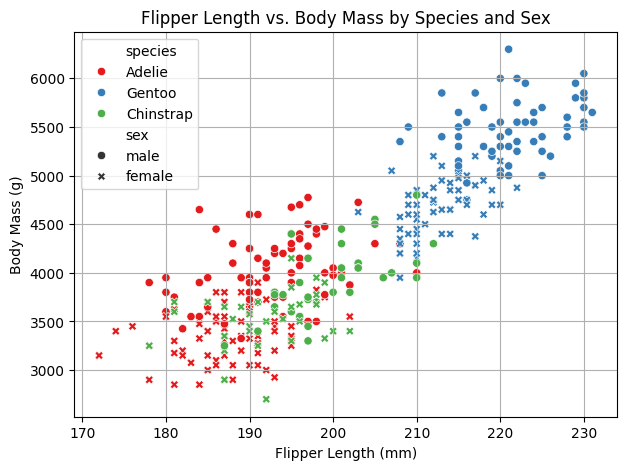

In [11]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df_clean, x="flipper_length_mm", y="body_mass_g", hue="species", style="sex", palette="Set1")
plt.title("Flipper Length vs. Body Mass by Species and Sex")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.grid(True)
plt.show()

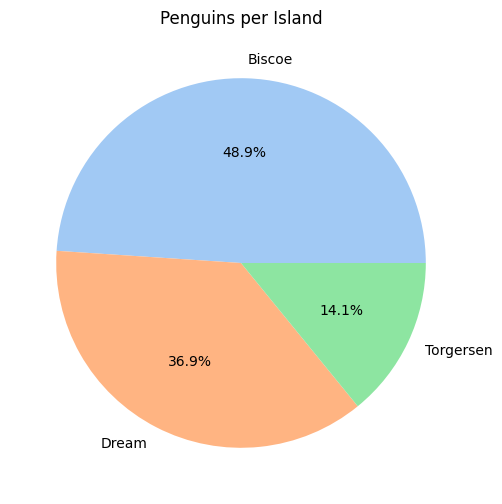

In [12]:
island_counts = df_clean['island'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(island_counts, labels=island_counts.index, autopct="%1.1f%%", colors=sns.color_palette("pastel"))
plt.title("Penguins per Island")
plt.show()

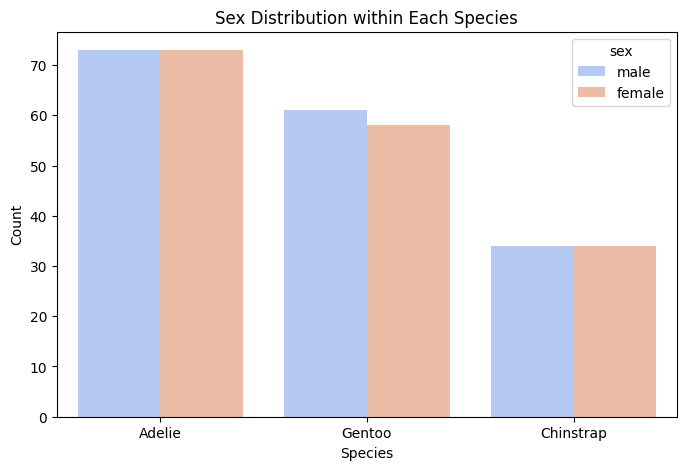

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x="species", hue="sex", palette="coolwarm")
plt.title("Sex Distribution within Each Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

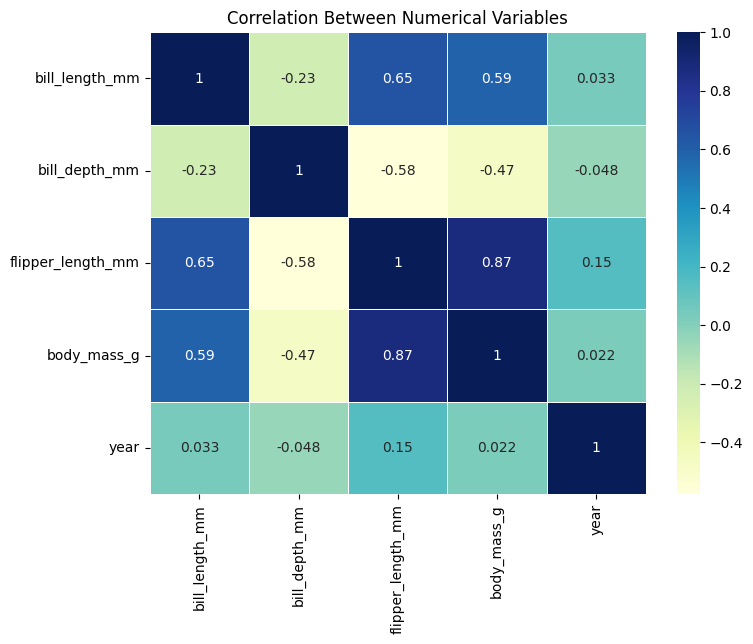

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean.select_dtypes(include='number').corr(), annot=True, cmap="YlGnBu", linewidths=0.5)
plt.title("Correlation Between Numerical Variables")
plt.show()

<ipython-input-15-5af08a30cc6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="species", y=feature, palette="pastel")


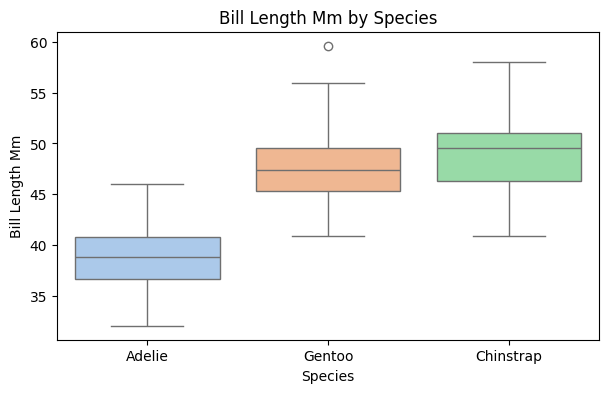

<ipython-input-15-5af08a30cc6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="species", y=feature, palette="pastel")


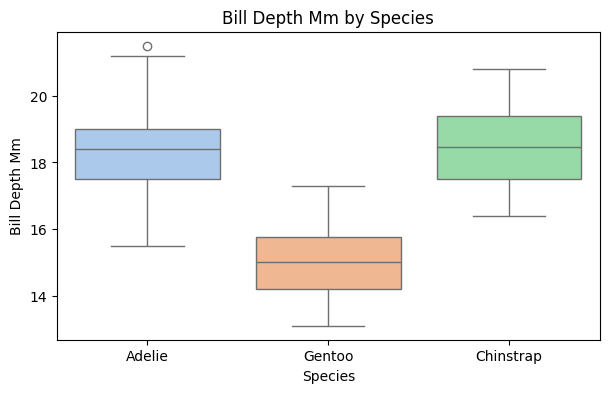

<ipython-input-15-5af08a30cc6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="species", y=feature, palette="pastel")


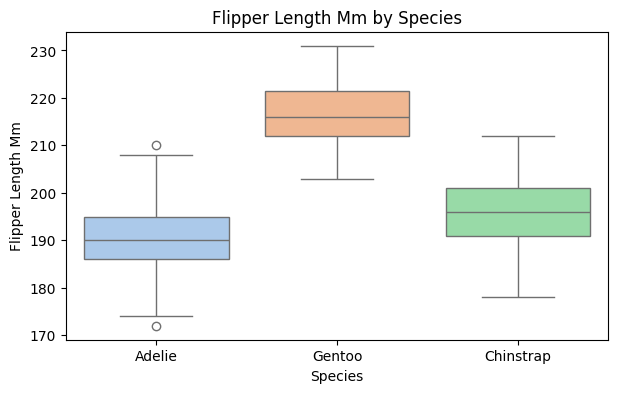

<ipython-input-15-5af08a30cc6a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="species", y=feature, palette="pastel")


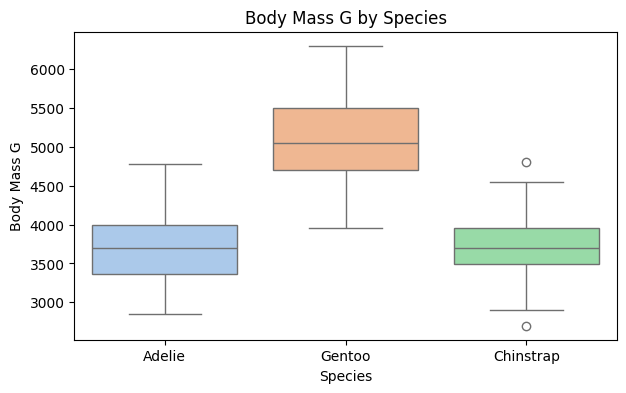

In [15]:
features = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]

for feature in features:
    plt.figure(figsize=(7, 4))
    sns.boxplot(data=df_clean, x="species", y=feature, palette="pastel")
    plt.title(f"{feature.replace('_', ' ').title()} by Species")
    plt.xlabel("Species")
    plt.ylabel(feature.replace('_', ' ').title())
    plt.show()

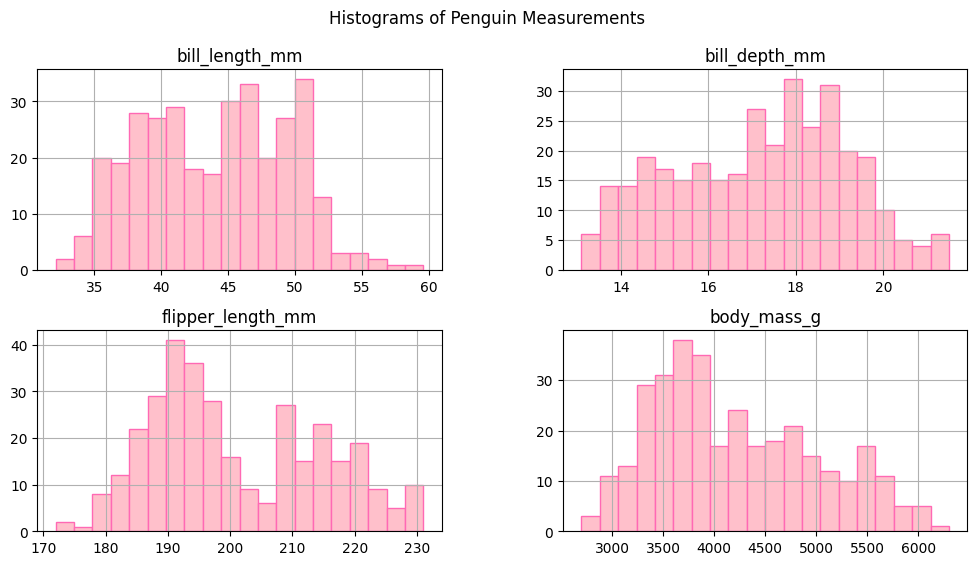

In [18]:
df_clean[features].hist(bins=20, figsize=(12, 6), color="pink", edgecolor="hotpink")
plt.suptitle("Histograms of Penguin Measurements")
plt.show()

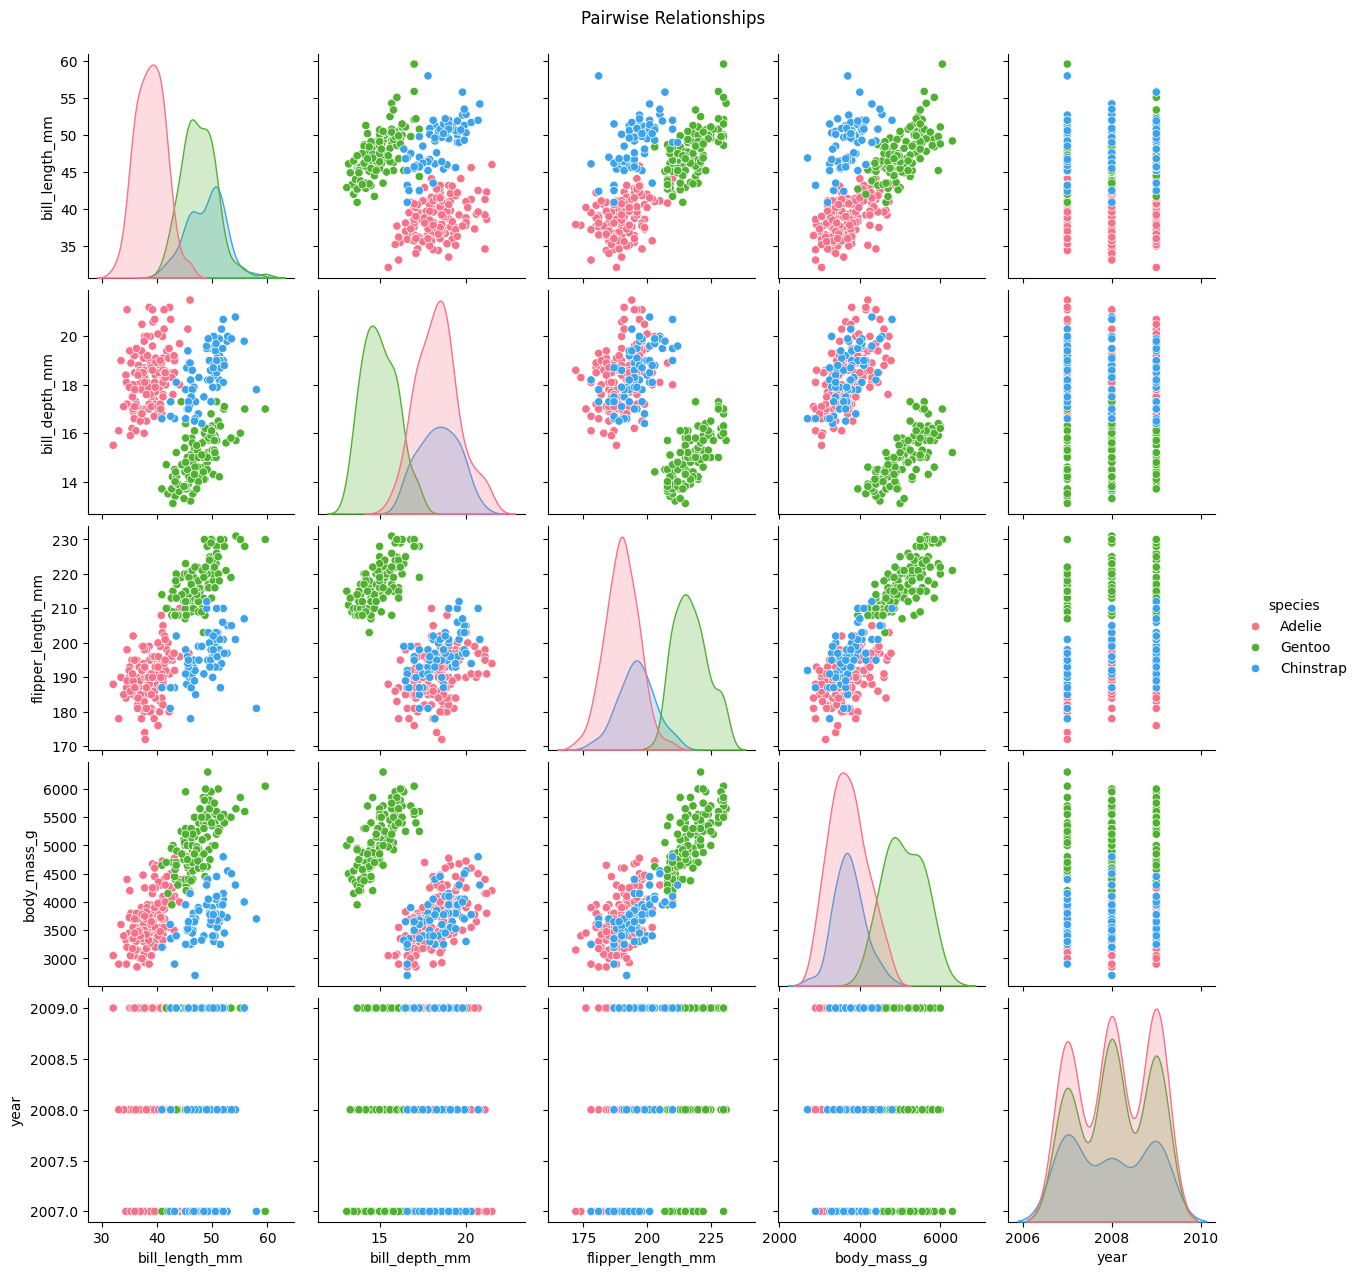

In [17]:
sns.pairplot(df_clean, hue="species", palette="husl")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

<ipython-input-19-72e0bf019908>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="species", y="flipper_length_mm", ax=axes[0], palette="Set2")
<ipython-input-19-72e0bf019908>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x="species", y="body_mass_g", ax=axes[1], palette="Set3")


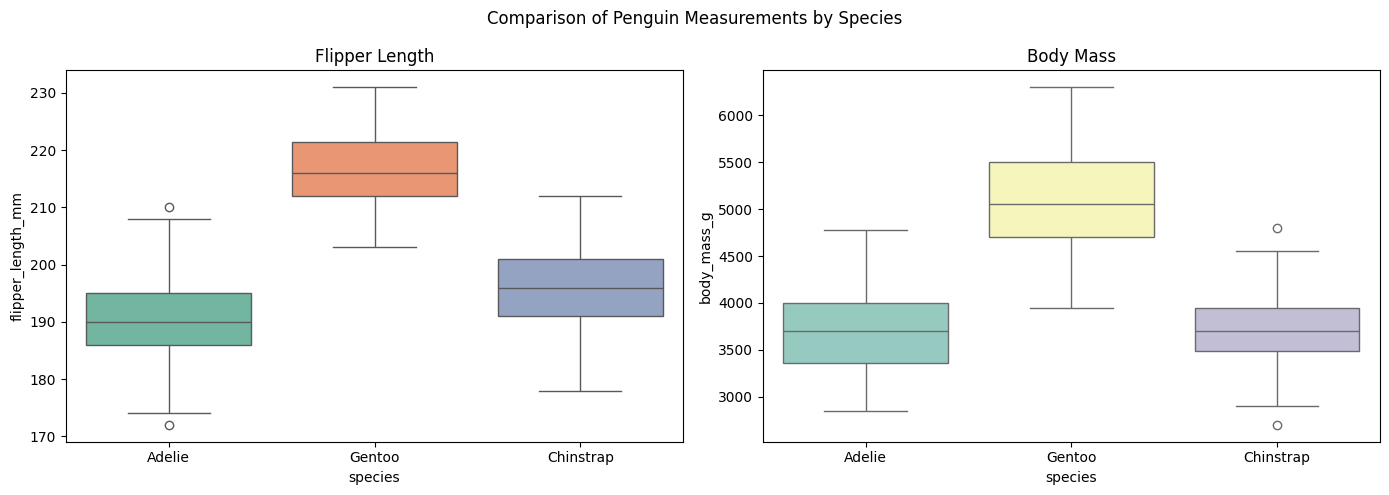

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(data=df_clean, x="species", y="flipper_length_mm", ax=axes[0], palette="Set2")
axes[0].set_title("Flipper Length")

sns.boxplot(data=df_clean, x="species", y="body_mass_g", ax=axes[1], palette="Set3")
axes[1].set_title("Body Mass")

plt.suptitle("Comparison of Penguin Measurements by Species")
plt.tight_layout()
plt.show()

## 📊 Palmer Penguins Data Visualization Summary

This project explored the Palmer Penguins dataset to uncover patterns across penguin species, body measurements, and habitat.

⸻

🐧 Species Distribution
	•	The most common species in the dataset is Adelie, followed by Gentoo and Chinstrap.
	•	Species are clearly distinguishable by their physical characteristics and distribution.

⸻

🏝️ Island Distribution
	•	Penguins are found across three islands: Biscoe, Dream, and Torgersen.
	•	Biscoe Island hosts the majority of the penguins in the dataset.

⸻

📐 Body Measurements and Relationships
	•	A positive correlation is observed between flipper length and body mass.
	•	Gentoo penguins tend to have the longest flippers and heaviest bodies.
	•	Adelie penguins generally have smaller body sizes compared to the other species.

⸻

🔬 Sex Distribution
	•	Within each species, males tend to have slightly higher body mass and flipper length than females.
	•	A few entries have missing or unknown sex values, which were handled during preprocessing.

⸻

🧪 Correlation Heatmap Insights
	•	Flipper length and body mass are strongly correlated.
	•	Bill length also shows moderate positive correlations with other body measurements.

⸻

📦 Boxplots and Histograms
	•	Boxplots revealed the variation in measurements across species, highlighting distinct physical traits.
	•	Histograms show that most measurements are normally distributed, with slight right skew in body mass.

⸻

🔄 Pairplot Analysis
	•	The Seaborn pairplot provided a comprehensive view of relationships between all numerical features.
	•	Species are well-separated in measurement space, reinforcing the idea that species can be classified based on body metrics.

⸻

✅ Conclusion

The Palmer Penguins dataset offers rich biological insight. Through exploratory visualizations, we learned how species, sex, and island affect physical traits. These patterns are clearly reflected across multiple plot types, demonstrating the power of visual analysis in understanding real-world datasets.